In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns

In [2]:
df =pd.read_csv("hotel_bookings.csv")

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df[np.isnan(df["children"])] = 0
df["country"]=df["country"].fillna("others")
df["agent"]=df["agent"].fillna(0)
# replacing Undefined with SC-> SC does not include breakfast
df["meal"].replace("Undefined", "SC", inplace=True)

In [6]:
df.drop("company", axis=1, inplace=True)

In [7]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         0.0                    0     Transient    0.00   
1         0.0                    0     Transient    0.00   
2         0.0                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

In [8]:
X=df[["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","agent","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"]]
X.head()

lead_time  arrival_date_year  arrival_date_week_number  \
0        342               2015                        27   
1        737               2015                        27   
2          7               2015                        27   
3         13               2015                        27   
4         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  \
0                               0                3    0.0   
1                               0                4    0.0   
2                               0                0    0.0   
3                               0                0  304.0   
4                               0                0  240.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

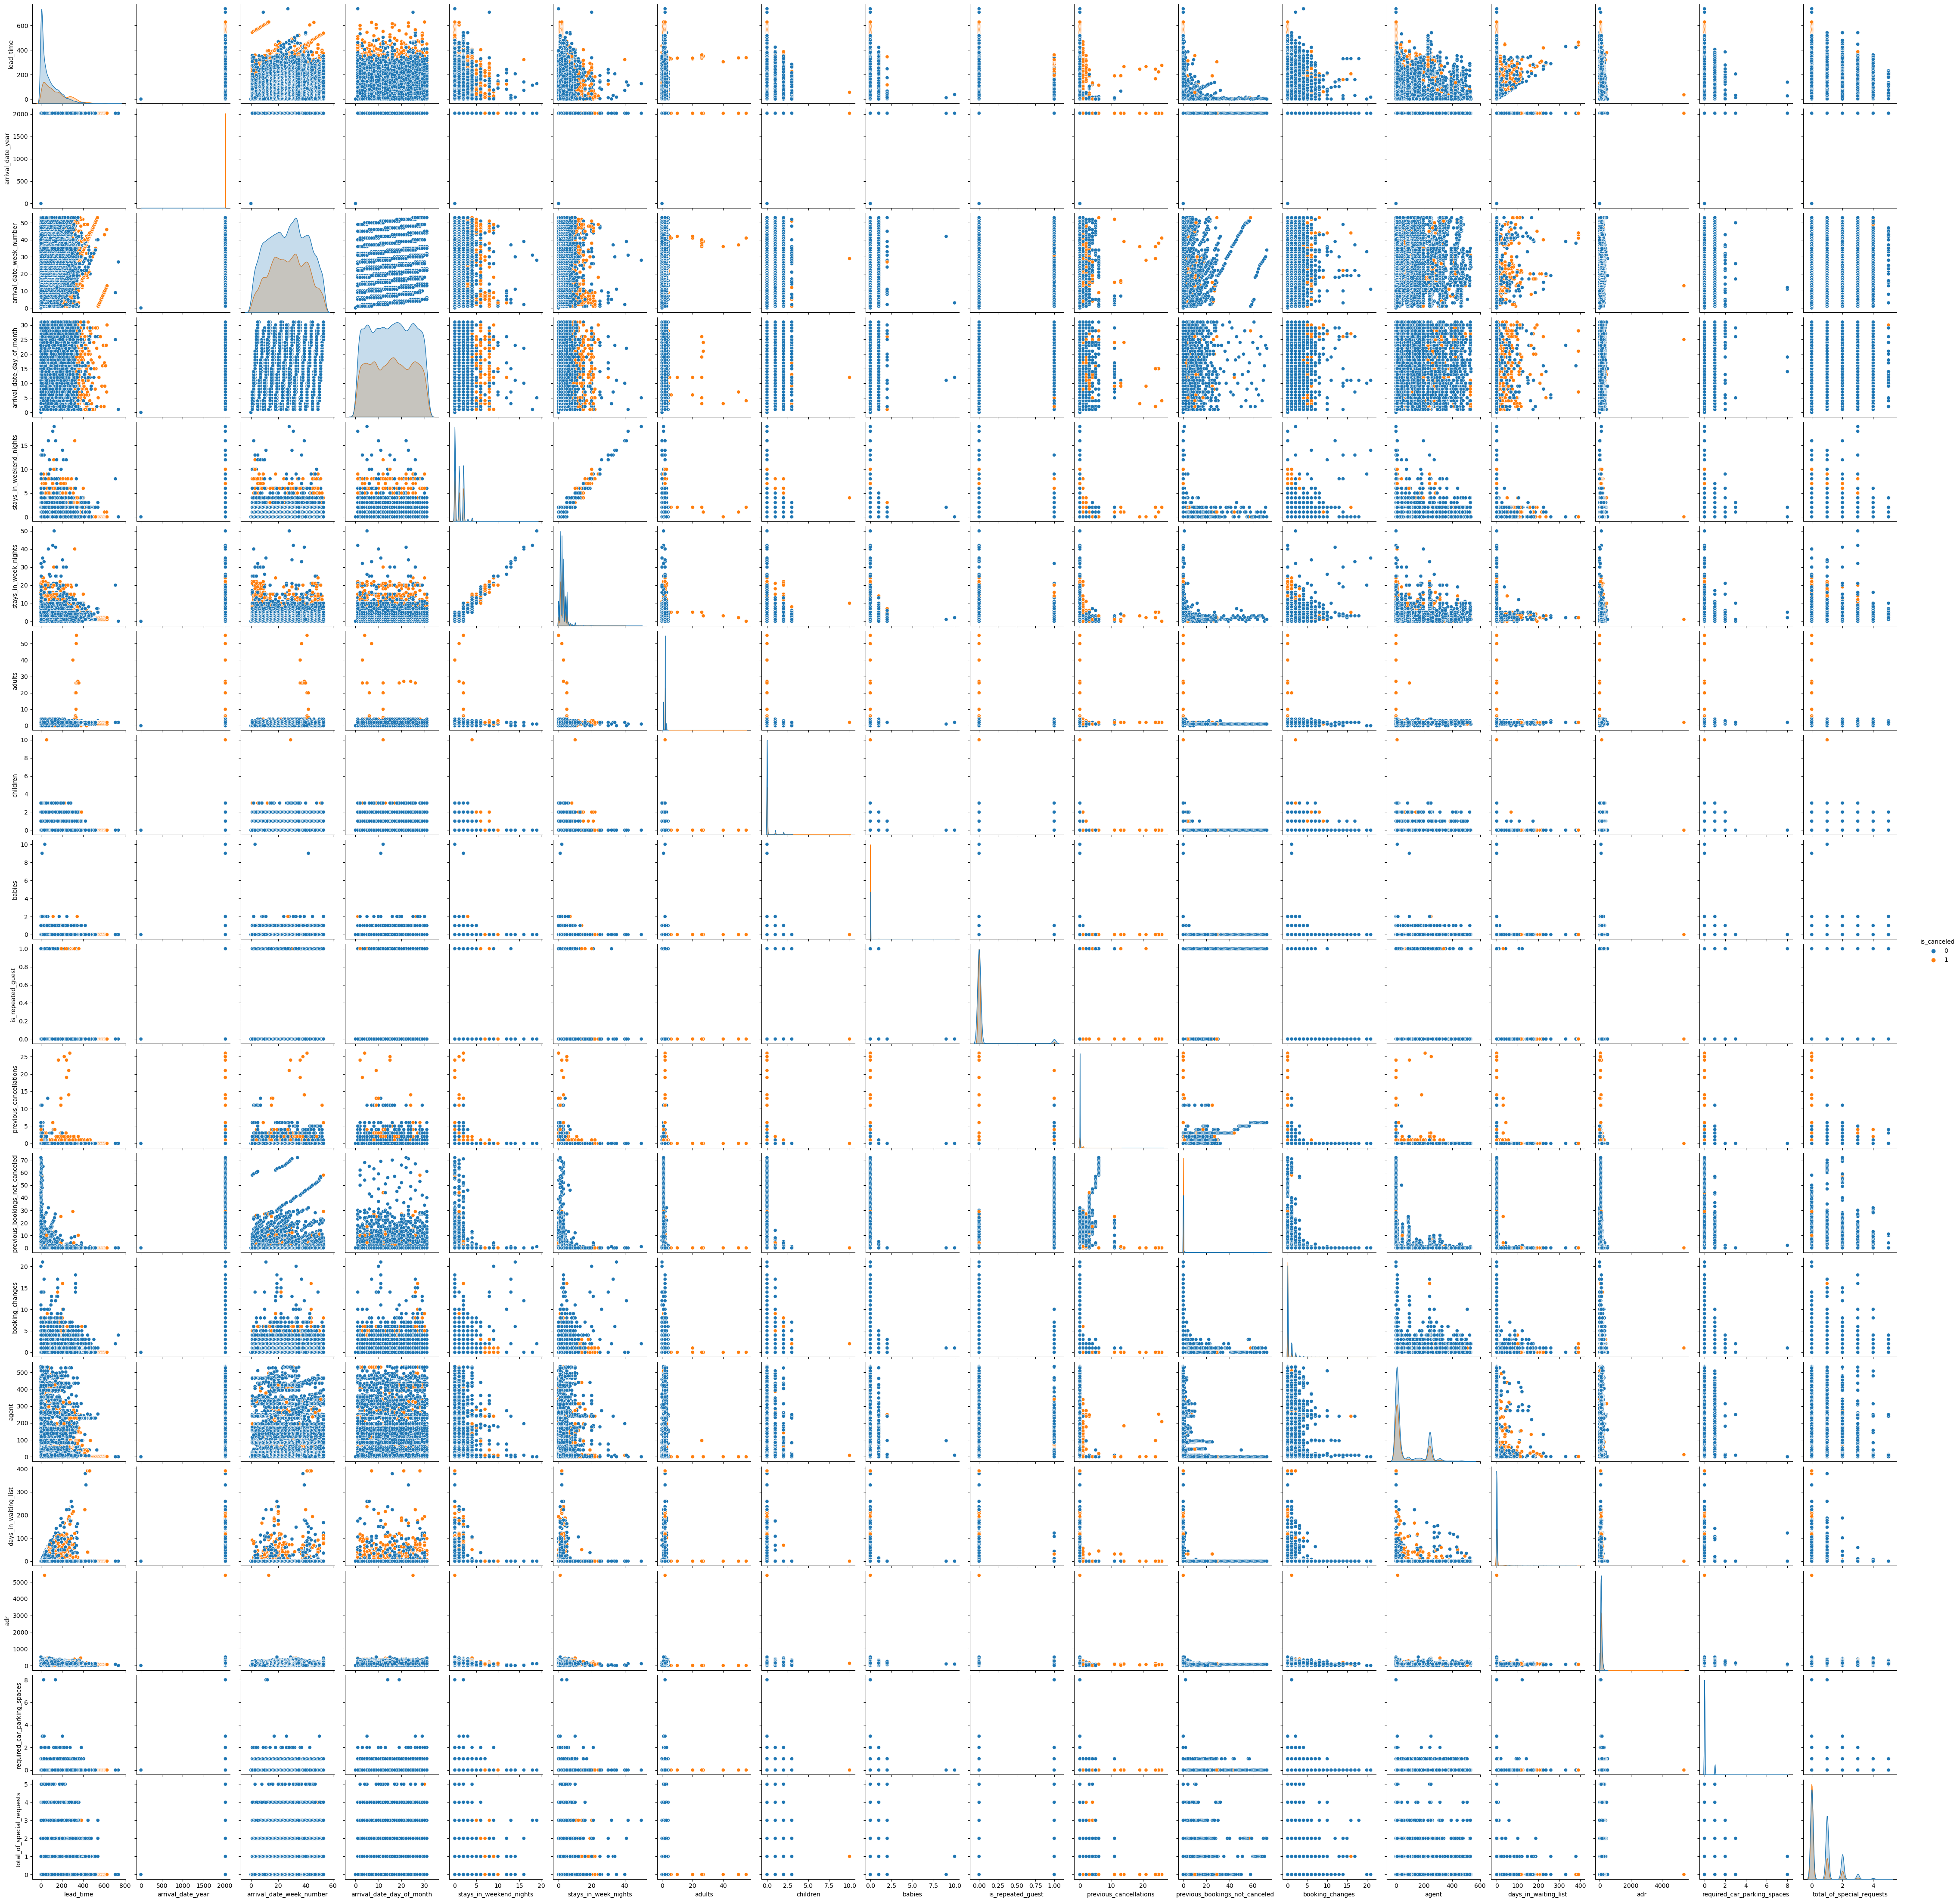

In [10]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

############# Main Section ############
# loading dataset using seaborn

# pairplot with hue sex
seaborn.pairplot(df, hue ='is_canceled')
# to show
plt.show()

# This code is contributed by Deepanshu Rustagi.



In [11]:
y=df[["is_canceled"]]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
rfc = RandomForestClassifier(n_estimators=1)


In [14]:
rfc.fit(x_train,y_train)


C:\Users\visha\AppData\Local\Temp\ipykernel_11500\31534324.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1)

In [15]:
predictions = rfc.predict(x_test)

In [16]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84     18768
           1       0.73      0.73      0.73     11080

    accuracy                           0.80     29848
   macro avg       0.79      0.79      0.79     29848
weighted avg       0.80      0.80      0.80     29848

